In [107]:
import numpy as np
np.random.seed(42)
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras import Sequential

In [120]:
df = pd.read_csv('RentalDaysCostCalculation.csv')
df

,Actor_ID,Category,Duration,Rating,RentalRate,ReplacementCost,Title,Month,Total Cost,Total Days Rented
0,1,Animation,92,R,0.99,9.99,ANACONDA CONFESSIONS,5,5,5
1,1,Animation,92,R,0.99,9.99,ANACONDA CONFESSIONS,6,28,28
2,1,Animation,92,R,0.99,9.99,ANACONDA CONFESSIONS,7,42,42
3,1,Animation,92,R,0.99,9.99,ANACONDA CONFESSIONS,8,17,17
4,1,Children,78,NC-17,0.99,26.99,LANGUAGE COWBOY,5,5,5
...,...,...,...,...,...,...,...,...,...,...
20029,200,Sci-Fi,73,NC-17,2.99,29.99,RANDOM GO,8,66,22
20030,200,Sports,174,NC-17,2.99,21.99,JADE BUNCH,5,33,11
20031,200,Sports,174,NC-17,2.99,21.99,JADE BUNCH,6,30,10
20032,200,Sports,174,NC-17,2.99,21.99,JADE BUNCH,7,78,26


In [109]:
df.columns

Index(['Actor_ID', 'Category', 'Duration', 'Rating', 'RentalRate',
       'ReplacementCost', 'Title', 'Month', 'Total Cost', 'Total Days Rented'],
      dtype='object')

In [118]:
df

,Actor_ID,Category,Duration,Rating,RentalRate,ReplacementCost,Title,Month,Total Cost,Total Days Rented,Category_index,Rating_index,Title_index
0,1,Animation,92,R,0.99,9.99,ANACONDA CONFESSIONS,5,5,5,1,4,21
1,1,Animation,92,R,0.99,9.99,ANACONDA CONFESSIONS,6,28,28,1,4,21
2,1,Animation,92,R,0.99,9.99,ANACONDA CONFESSIONS,7,42,42,1,4,21
3,1,Animation,92,R,0.99,9.99,ANACONDA CONFESSIONS,8,17,17,1,4,21
4,1,Children,78,NC-17,0.99,26.99,LANGUAGE COWBOY,5,5,5,2,1,481
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20029,200,Sci-Fi,73,NC-17,2.99,29.99,RANDOM GO,8,66,22,13,1,679
20030,200,Sports,174,NC-17,2.99,21.99,JADE BUNCH,5,33,11,14,1,448
20031,200,Sports,174,NC-17,2.99,21.99,JADE BUNCH,6,30,10,14,1,448
20032,200,Sports,174,NC-17,2.99,21.99,JADE BUNCH,7,78,26,14,1,448


In [111]:
df.shape

(20034, 10)

In [112]:
string_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in string_cols:
    df[col + '_index'] = df[col].astype('category').cat.codes


In [113]:
df.columns

Index(['Actor_ID', 'Category', 'Duration', 'Rating', 'RentalRate',
       'ReplacementCost', 'Title', 'Month', 'Total Cost', 'Total Days Rented',
       'Category_index', 'Rating_index', 'Title_index'],
      dtype='object')

In [114]:
X_data = df[['Actor_ID','Category_index', 'Rating_index' , 'Title_index' , 'Month']]
y_data = df['Total Days Rented']

Xtrain, Xtest, ytrain, ytest = train_test_split(
    X_data,
    y_data,
    test_size = 0.3,
    random_state = 42,
)



In [115]:
Xtrain.head()

,Actor_ID,Category_index,Rating_index,Title_index,Month
5617,58,4,0,609,2
14975,149,4,4,342,8
895,11,5,1,559,8
19073,191,6,0,912,8
8698,89,3,1,924,8


In [116]:
ytrain.head()

5617      0
14975    33
895      22
19073    44
8698     52
Name: Total Days Rented, dtype: int64

In [121]:
model = Sequential([
    Dense(8,activation = "relu"),
    Dense(8,activation = "relu"),
    Dense(1)
])
#compiling model and set optimizer and loss function
model.compile(loss='mean_squared_error', optimizer='adam')
History = model.fit(Xtrain,ytrain , epochs=10)

model.summary()

Epoch 1/10
439/439 [==============================] - 1s 645us/step - loss: 818.9018
Epoch 2/10
439/439 [==============================] - 0s 635us/step - loss: 311.4251
Epoch 3/10
439/439 [==============================] - 0s 647us/step - loss: 293.2077
Epoch 4/10
439/439 [==============================] - 0s 631us/step - loss: 277.4399
Epoch 5/10
439/439 [==============================] - 0s 626us/step - loss: 264.4909
Epoch 6/10
439/439 [==============================] - 0s 641us/step - loss: 252.3073
Epoch 7/10
439/439 [==============================] - 0s 620us/step - loss: 240.8598
Epoch 8/10
439/439 [==============================] - 0s 618us/step - loss: 230.6070
Epoch 9/10
439/439 [==============================] - 0s 623us/step - loss: 222.3613
Epoch 10/10
439/439 [==============================] - 0s 625us/step - loss: 215.7700
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param 

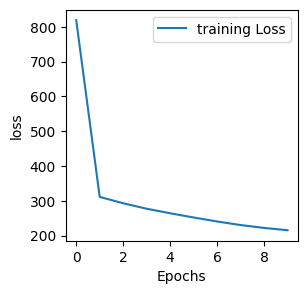

In [123]:
plt.figure(figsize=(3,3))
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.plot(History.history['loss'], label='training Loss')
plt.legend()

In [88]:
y_pred = model.predict(Xtest)
print("X_test:\n", Xtest)
print("\ny_pred:\n", y_pred)


188/188 [==============================] - 0s 490us/step
X_test:
        Actor_ID  Category_index  Rating_index  Title_index  Month
13883       139               8             3          159      7
12216       123               0             3          502      5
17441       174              15             3          469      5
18152       181              13             1          596      8
4328         45               5             2          153      6
...         ...             ...           ...          ...    ...
12382       124               9             0           99      6
6536         66              14             1          338      6
11091       111               6             0          167      5
5088         53               0             0          665      8
9857        101               2             1           60      7

[6011 rows x 5 columns]

y_pred:
 [[25.59885 ]
 [17.852703]
 [13.362949]
 ...
 [17.698658]
 [30.035229]
 [24.714893]]


In [91]:
model = LinearRegression()
model.fit(Xtrain, ytrain)

y_pred = model.predict(Xtest)
mse = mean_squared_error(ytest, y_pred)

print("Mean squared error: ", mse)


Mean squared error:  180.06761623968458


In [104]:
# Add y_pred as a new column to Xtest
Xtest_with_ypred = Xtest.assign(y_pred=y_pred)
Xtest_with_ypred = Xtest_with_ypred.rename(columns={'Actor_ID': 'Actor', 'Category_index': 'Category', 'Rating_index': 'Rating', 'Title_index': 'Title' , 'y_pred' : 'Total day rented'})
# Print the new DataFrame with y_pred column
print(Xtest_with_ypred)


       Actor  Category  Rating  Title  Month  Total day rented
13883    139         8       3    159      7         26.338554
12216    123         0       3    502      5         12.791761
17441    174        15       3    469      5         11.354393
18152    181        13       1    596      8         32.161957
4328      45         5       2    153      6         19.425480
...      ...       ...     ...    ...    ...               ...
12382    124         9       0     99      6         18.805680
6536      66        14       1    338      6         18.214547
11091    111         6       0    167      5         12.024512
5088      53         0       0    665      8         33.169781
9857     101         2       1     60      7         26.693958

[6011 rows x 6 columns]
